In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Logistic Regression

## Undersampled

Training time: 0.08973383903503418 seconds (undersampled)
Accuracy: 0.7633061991233563
Confusion Matrix:
[[1802  598]
 [ 536 1855]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2400
           1       0.76      0.78      0.77      2391

    accuracy                           0.76      4791
   macro avg       0.76      0.76      0.76      4791
weighted avg       0.76      0.76      0.76      4791



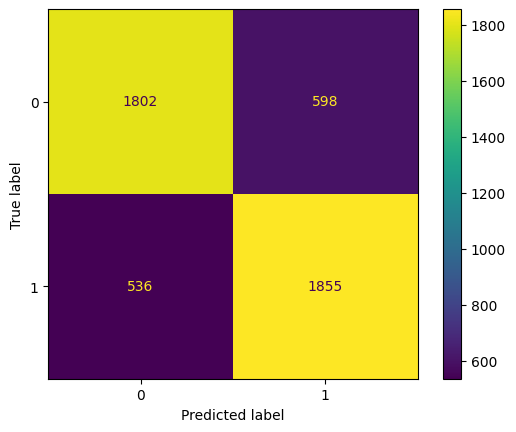

In [3]:
data = pd.read_csv('data/league_data_cleaned.csv')

# dropping the game ID column
X = data.drop(columns=[data.columns[0], 'blueWin'])
y = data['blueWin']

# normalizing the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# undersampling the data
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_scaled, y)

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# defining the logistic regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)

# training the model
start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

print(f"Training time: {end_time - start_time} seconds (undersampled)")

# making predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# evaluating the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f"Accuracy: {accuracy_log_reg}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg)
disp.plot()
plt.show()

Training time: 0.008610010147094727 seconds (oversampled)
Accuracy: 0.75719828466408
Confusion Matrix:
[[1843  588]
 [ 601 1865]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2431
           1       0.76      0.76      0.76      2466

    accuracy                           0.76      4897
   macro avg       0.76      0.76      0.76      4897
weighted avg       0.76      0.76      0.76      4897



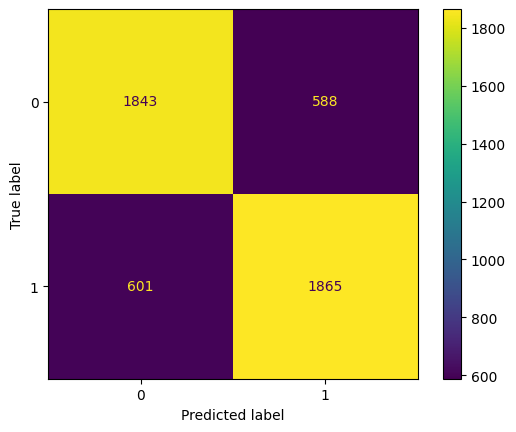

In [4]:
data = pd.read_csv('data/league_data_cleaned.csv')

# dropping the game ID column
X = data.drop(columns=[data.columns[0], 'blueWin'])
y = data['blueWin']

# normalizing the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# oversampling the data
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_scaled, y)

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# defining the logistic regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)

# training the model
start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

print(f"Training time: {end_time - start_time} seconds (oversampled)")

# making predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# evaluating the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f"Accuracy: {accuracy_log_reg}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg)
disp.plot()
plt.show()